# Bharat Intern Internship

## Task 2: Titanic Classification


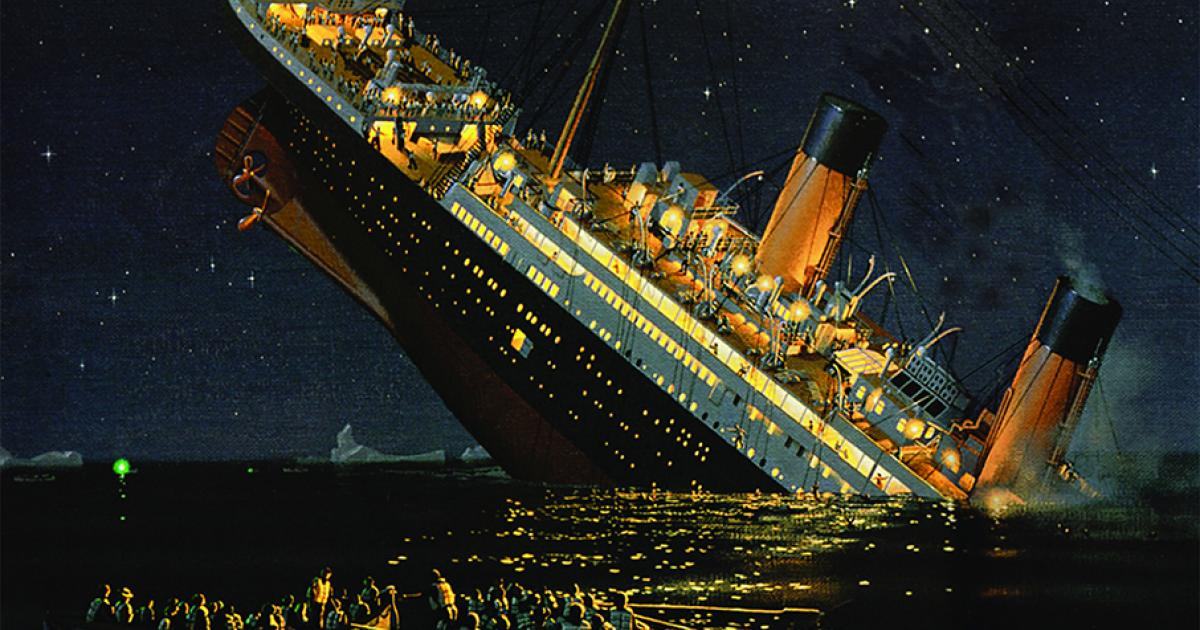

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.


In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.


    Objective:
        
Understand the Dataset & cleanup (if required).
Build a strong classification model to predict whether the passenger survives or not.
Compare the evaluation metrics of various classification algorithms.

# Data Preparation

In [38]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
titanic = pd.read_csv("C:\\Users\\DIYANN\\Downloads\\Titanic-Dataset.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [42]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
1)PassengerId: unique id number to each passenger
2)Survived: passenger survive(1) or died(0)
3)Pclass: passenger class
4)Name: name
5)Sex: gender of passenger
6)Age: age of passenger
7)SibSp: number of siblings/spouses
8)Parch: number of parents/children
9)Ticket: ticket number
10)Fare: amount of money spent on ticket
11)Cabin: cabin category
12)Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton

In [27]:
titanic.shape

(891, 12)

In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
# checking for duplicated values
titanic.duplicated().sum()

0

In [44]:
null_values = titanic.isnull()
print(null_values)

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [45]:
#checking for null values
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
titanic.drop(columns = 'Cabin', axis = 1, inplace = True)
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [47]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [48]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [49]:
# Finding no. of unique values in each column of dataset
titanic[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']].nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             89
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

## Dropping Some Unnecessary Columns

In [50]:
titanic.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [51]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [52]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Visualisation

1)SEX

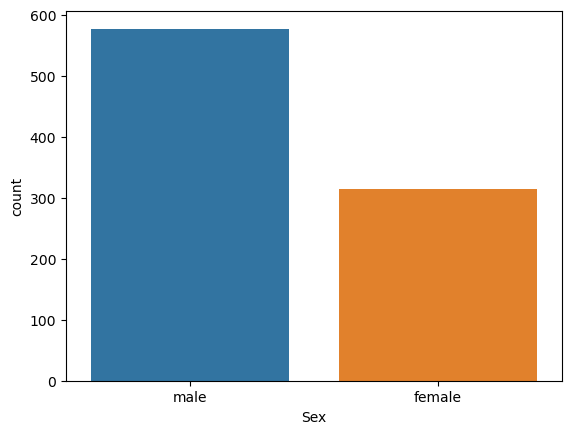

In [53]:
sns.countplot(x=titanic['Sex'])
plt.show()

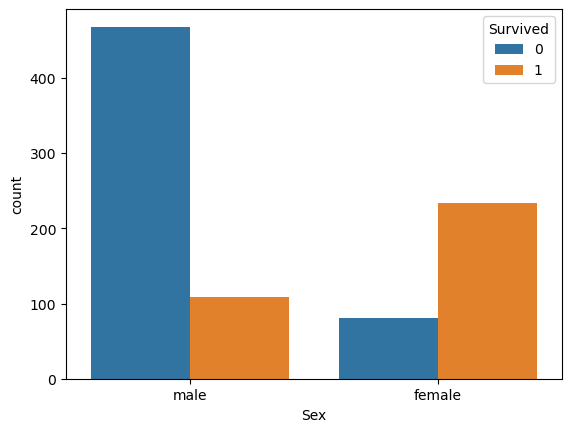

In [54]:
sns.countplot(x=titanic['Sex'],hue=titanic['Survived']) # In Sex (0 represents female and 1 represents male)
plt.show()

This plot clearly shows male died more than females and females survived more than male

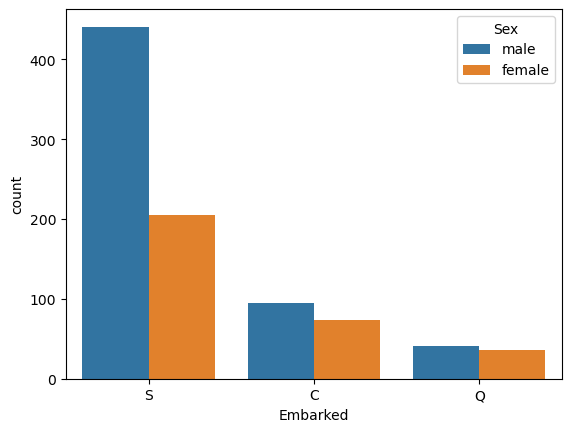

In [55]:
#Embraked and sex
sns.countplot(x=titanic['Embarked'],hue=titanic['Sex'])
plt.show()

2)AGE

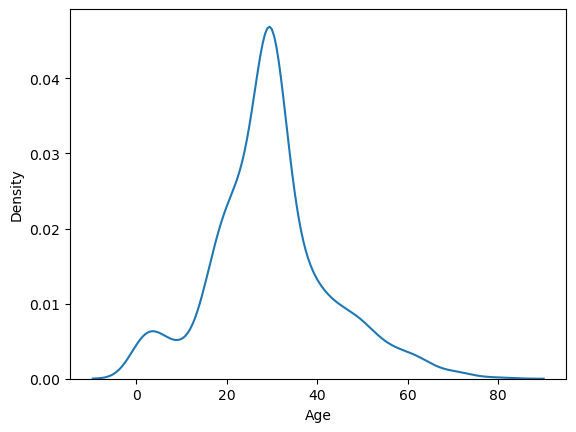

In [56]:
sns.kdeplot(x=titanic['Age'])
plt.show()

From this plot it came to know that most of the people die between 20-40 age group.

### Analysing Target Variable


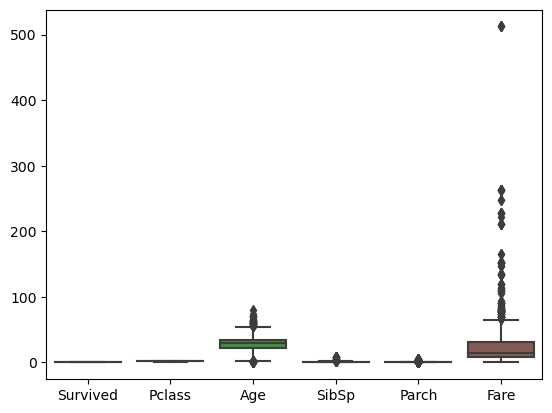

In [63]:
# Plotting Boxplot for dataset
# Checking for outliers
sns.boxplot(titanic)
plt.show()

There is outliers in age and fare

C:\Users\DIYANN\AppData\Local\Temp\ipykernel_8544\345043542.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(),annot=True,cmap='coolwarm')


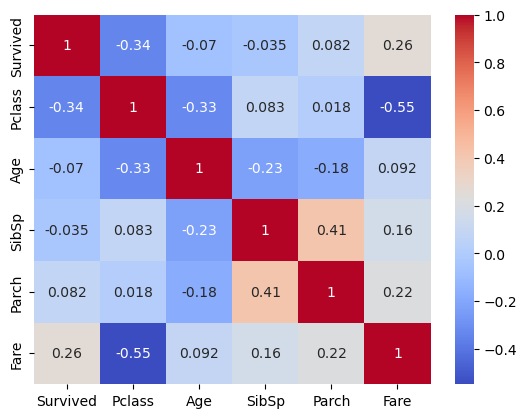

In [64]:
# Showing Correlation Plot
sns.heatmap(titanic.corr(),annot=True,cmap='coolwarm')
plt.show()

Strong Positive Correlation between SibSp and Parch
Strong Negative Correlation between Pclass and Fare

Survived Column

0    549
1    342
Name: Survived, dtype: int64


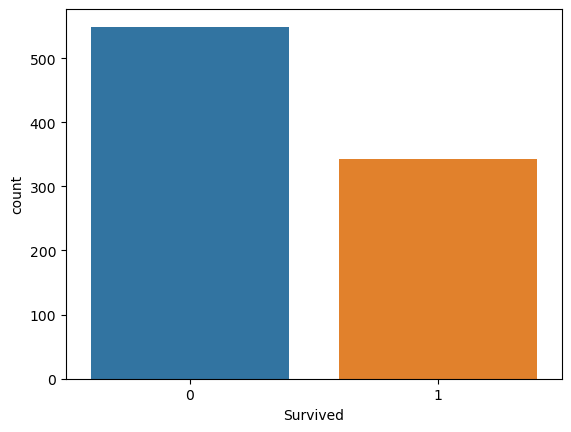

In [57]:
print(titanic['Survived'].value_counts())
sns.countplot(x=titanic['Survived'])
plt.show()

This plot Clearly shows most people are died(0=Died,1=Survived)

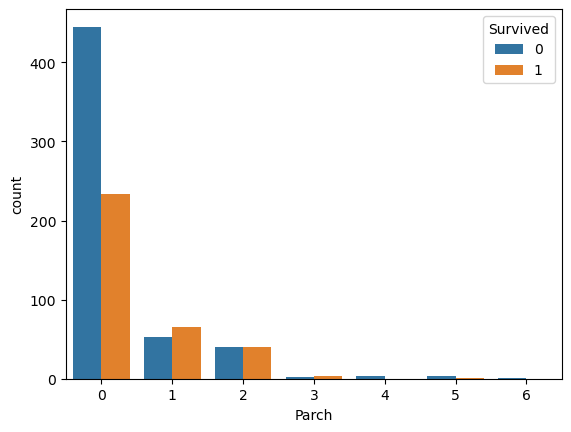

In [58]:
# Showing Distribution of Parch Survived Wise
sns.countplot(x=titanic['Parch'],hue=titanic['Survived'])
plt.show()

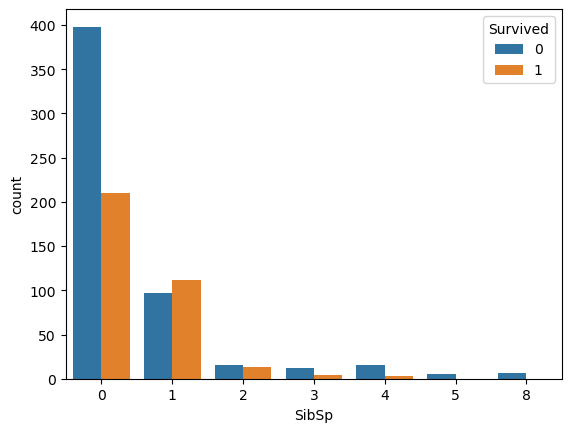

In [59]:
# Showing Distribution of SibSp Survived Wise
sns.countplot(x=titanic['SibSp'],hue=titanic['Survived'])
plt.show()

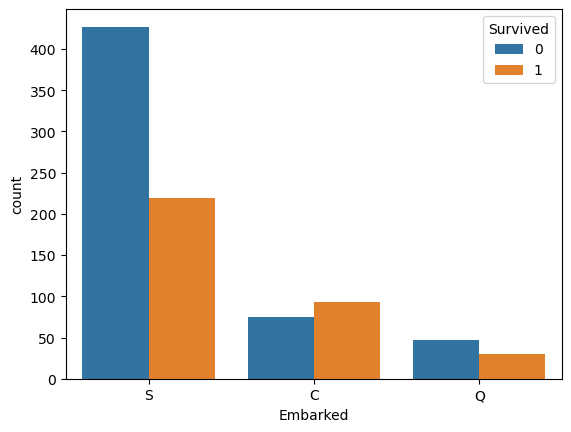

In [60]:
# Showing Distribution of Embarked Survived wise
sns.countplot(x=titanic['Embarked'],hue=titanic['Survived'])
plt.show()

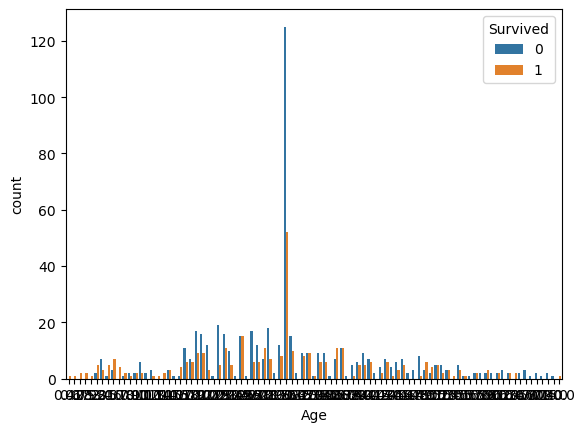

In [61]:
 #Showing Distribution of Age Survived Wise
sns.countplot(x=titanic['Age'],hue=titanic['Survived'])
plt.show()

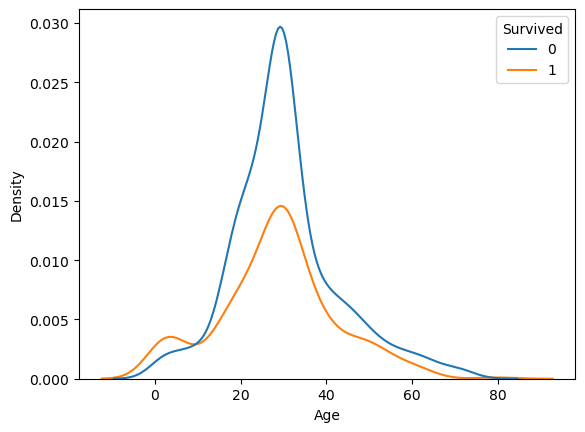

In [62]:
sns.kdeplot(x=titanic['Age'],hue=titanic['Survived'])
plt.show()

This Plot showing most people of age group of 20-40 are died

In [65]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for column in ['Sex','Embarked']:
    titanic[column] = le.fit_transform(titanic[column])

titanic.head()

# Sex Column

# 0 represents female
# 1 represents Male

# Embarked Column

# 0 represents C
# 1 represents Q
# 2 represents S

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Data Modeling

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [68]:
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = titanic[cols]
y = titanic['Survived']
print(x.shape)
print(y.shape)
print(type(x)) 
print(type(y))

(891, 7)
(891,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#### Train_Test Split

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


##### Computing Confusion Matrix, Classification Report and to generate Training and the Testing Score

In [70]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest,ypred))

def mscore(model):
    print('Training Score',model.score(x_train,y_train)) 
    print('Testing Score',model.score(x_test,y_test))

In [72]:
LR = LogisticRegression(max_iter=1000,solver='liblinear')
LR.fit(x_train,y_train)
mscore(LR)

Training Score 0.8052434456928839
Testing Score 0.7666666666666667


In [73]:
#Predictioins
ypred_lr = LR.predict(x_test)
print(ypred_lr)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [74]:
#confusion matrix,classification report,Accuracy
cls_eval(y_test,ypred_lr)
acc_lr = accuracy_score(y_test,ypred_lr)
print('Accuracy Score',acc_lr)

Confusion Matrix
 [[46  7]
 [14 23]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.87      0.81        53
           1       0.77      0.62      0.69        37

    accuracy                           0.77        90
   macro avg       0.77      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90

Accuracy Score 0.7666666666666667


In [78]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
mscore(knn)

Training Score 0.7752808988764045
Testing Score 0.6777777777777778


In [79]:
ypred_knn = knn.predict(x_test)
print(ypred_knn)

[1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]


In [80]:
cls_eval(y_test,ypred_knn)
acc_knn = accuracy_score(y_test,ypred_knn)
print('Accuracy Score',acc_knn)

Confusion Matrix
 [[47  6]
 [23 14]]
Classification Report
               precision    recall  f1-score   support

           0       0.67      0.89      0.76        53
           1       0.70      0.38      0.49        37

    accuracy                           0.68        90
   macro avg       0.69      0.63      0.63        90
weighted avg       0.68      0.68      0.65        90

Accuracy Score 0.6777777777777778


In [90]:
rfc=RandomForestClassifier(n_estimators=80,criterion='entropy',min_samples_split=5,max_depth=10)
rfc.fit(x_train,y_train)
mscore(rfc)

Training Score 0.9138576779026217
Testing Score 0.7666666666666667


In [91]:
ypred_rfc = rfc.predict(x_test)
print(ypred_rfc)

[1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [92]:
cls_eval(y_test,ypred_rfc)
acc_rfc = accuracy_score(y_test,ypred_rfc)
print('Accuracy Score',acc_rfc)

Confusion Matrix
 [[47  6]
 [15 22]]
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        53
           1       0.79      0.59      0.68        37

    accuracy                           0.77        90
   macro avg       0.77      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90

Accuracy Score 0.7666666666666667


In [93]:
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_split=10)
dt.fit(x_train, y_train)
mscore(dt)

Training Score 0.8526841448189763
Testing Score 0.7777777777777778


In [94]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [95]:
cls_eval(y_test,ypred_dt)
acc_dt = accuracy_score(y_test,ypred_dt)
print('Accuracy Score',acc_dt)

Confusion Matrix
 [[46  7]
 [13 24]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        53
           1       0.77      0.65      0.71        37

    accuracy                           0.78        90
   macro avg       0.78      0.76      0.76        90
weighted avg       0.78      0.78      0.77        90

Accuracy Score 0.7777777777777778


In [96]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','knn','Random Forest Classifier','Decision Tree Classifier'],
    'Score': [acc_lr,acc_knn,acc_rfc,acc_dt]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Decision Tree Classifier,0.777778
0,Logistic Regression,0.766667
2,Random Forest Classifier,0.766667
1,knn,0.677778


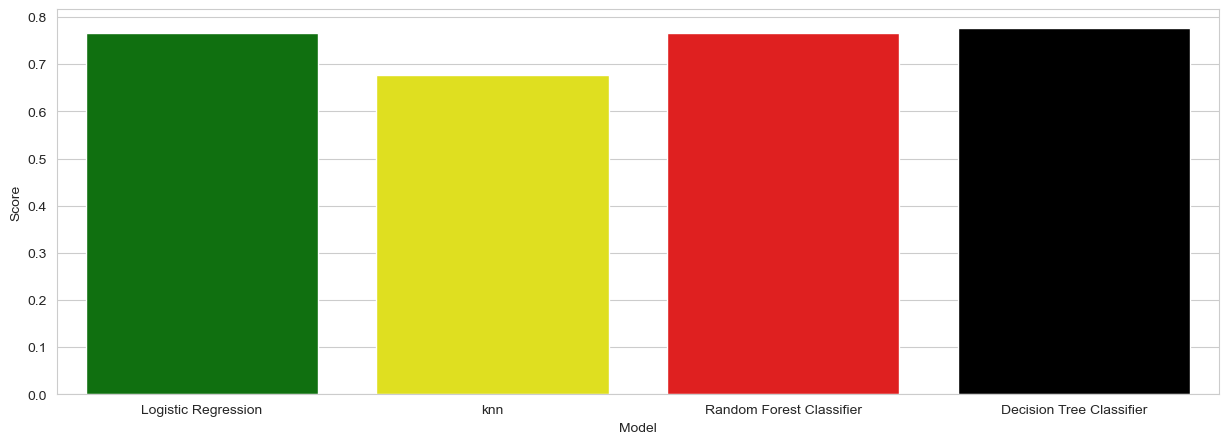

In [101]:
colors = ["green", "yellow", "red", "black"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()